# SPACEL workflow (1/3): Deconvolution by KanCell_l on mouse brain ST dataset

July 2023

Dataset: 75 ST slices of mouse brain ([here](https://zenodo.org/record/8167488))

In [1]:
import sys
sys.path.append('/data/wzh/KanCell-main')


In [2]:
import pandas as pd
import scanpy as sc
import anndata
import os
from tqdm import tqdm 
import scanpy as sc
import numpy as np
import sys

## Load spatial transcriptomics data

The input data are anndata objects stored raw counts for scRNA-seq and ST. The scRNA-seq anndata must have cell type annotation in ``.obs``.

In [3]:
# adata = sc.read('/data/KanCell-main/docs/data/visium_human_breast_cancer/Spatial1.h5ad')
# scadata = sc.read_h5ad('/data/KanCell-main/docs/data/visium_human_breast_cancer/scRNA.h5ad')

adata = sc.read('/data/wzh/data/CytoSPACE_example_breast_cancer/Spatial1.h5ad')
scadata = sc.read_h5ad('/data/wzh/data/CytoSPACE_example_breast_cancer/scRNA.h5ad')

In [4]:
scadata.var_names_make_unique()
scadata.obs_names_make_unique()

In [5]:
# import scanpy as sc
# import matplotlib.pyplot as plt
# import seaborn as sns
# sc.pp.neighbors(scadata, n_pcs=50)
# sc.tl.umap(scadata)
# with plt.rc_context({'figure.figsize': (10, 10)}):
#     sc.pl.umap(scadata, color='CellType', add_outline=True, legend_loc='on data',title='cell_type',
#                legend_fontsize=15, legend_fontoutline=1.2, frameon=False,
#                 palette='Set1',size=30)

## Initialize and train the KanCell_l model

In this step, we initialize the KanCell_l model using anndata objects for scRNA-seq and ST as input. The``celltype_key`` parameter represents the column name of the cell type annotation in the .obs attribute of the scRNA-seq anndata object. The ``sm_size`` parameter controls the number of simulated spots, and it is important to have a sufficient ``sm_size`` for accurate prediction. However, it should be noted that increasing the ``sm_size`` will also increase the simulation and training time. In general, we recommend setting ``sm_size`` to a value greater than 100,000.

In [6]:
# import KanCell
from KanCell import KanCell_l
from KanCell.setting import set_environ_seed
set_environ_seed()
from KanCell import KanCell_l

Global seed set to 0
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setting environment seed: 42


In [7]:
KanCell_l_model = KanCell_l.init_model(scadata,adata,celltype_key='CellType',sm_size=500000,use_gpu=True,n_threads=16)

Setting global seed: 42
### Finding marker genes...
TYPE_B cells                      200
TYPE_Dendritic cells              200
TYPE_Endothelial cells            200
TYPE_Epithelial cells             200
TYPE_Fibroblasts                  200
TYPE_Monocytes and Macrophages    200
TYPE_NK cells                     200
TYPE_PVL                          200
TYPE_T cells CD4                  200
TYPE_T cells CD8                  200
TYPE_PCs                          140
Name: CellType, dtype: int64
### Used gene numbers: 1764
### Initializing sample probability
### Genetating simulated spatial data using scRNA data with mode: unbalance
### Genetating simulated spatial data using scRNA data with mode: sqrt
### Genetating simulated spatial data using scRNA data with mode: balance


In [8]:
import os,sys
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
KanCell_l_model.train(max_steps=5000, batch_size=1024)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:90: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A40') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]


Epoch 1/100:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/100:   1%|          | 1/100 [00:09<15:22,  9.32s/it, loss=2.16e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 3/100:   2%|▏         | 2/100 [00:18<15:02,  9.21s/it, loss=2.1e+03, v_num=1] 

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 4/100:   3%|▎         | 3/100 [00:27<14:51,  9.19s/it, loss=2.06e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 5/100:   4%|▍         | 4/100 [00:36<14:40,  9.17s/it, loss=2.04e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 6/100:   5%|▌         | 5/100 [00:58<21:28, 13.56s/it, loss=2.02e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 7/100:   6%|▌         | 6/100 [01:13<21:59, 14.04s/it, loss=2.01e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 8/100:   7%|▋         | 7/100 [01:22<19:14, 12.42s/it, loss=1.99e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 9/100:   8%|▊         | 8/100 [01:31<17:28, 11.40s/it, loss=1.98e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 10/100:   9%|▉         | 9/100 [01:40<16:11, 10.67s/it, loss=1.97e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 11/100:  10%|█         | 10/100 [01:49<15:17, 10.19s/it, loss=1.96e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 12/100:  11%|█         | 11/100 [01:58<14:38,  9.87s/it, loss=1.95e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 13/100:  12%|█▏        | 12/100 [02:07<14:08,  9.64s/it, loss=1.95e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 14/100:  13%|█▎        | 13/100 [02:16<13:44,  9.48s/it, loss=1.94e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 15/100:  14%|█▍        | 14/100 [02:26<13:25,  9.37s/it, loss=1.93e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 16/100:  15%|█▌        | 15/100 [02:35<13:11,  9.32s/it, loss=1.93e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 17/100:  16%|█▌        | 16/100 [02:44<12:58,  9.26s/it, loss=1.92e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 18/100:  17%|█▋        | 17/100 [02:54<13:17,  9.61s/it, loss=1.91e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 19/100:  18%|█▊        | 18/100 [03:04<13:08,  9.62s/it, loss=1.91e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/100:  19%|█▉        | 19/100 [03:15<13:35, 10.06s/it, loss=1.9e+03, v_num=1] 

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 21/100:  20%|██        | 20/100 [03:24<13:01,  9.77s/it, loss=1.9e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 22/100:  21%|██        | 21/100 [03:33<12:36,  9.57s/it, loss=1.9e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 23/100:  22%|██▏       | 22/100 [03:42<12:15,  9.43s/it, loss=1.89e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 24/100:  23%|██▎       | 23/100 [03:51<11:57,  9.32s/it, loss=1.89e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 25/100:  24%|██▍       | 24/100 [04:00<11:43,  9.25s/it, loss=1.89e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 26/100:  25%|██▌       | 25/100 [04:10<11:29,  9.20s/it, loss=1.89e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 27/100:  26%|██▌       | 26/100 [04:19<11:18,  9.17s/it, loss=1.88e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 28/100:  27%|██▋       | 27/100 [04:28<11:07,  9.14s/it, loss=1.88e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 29/100:  28%|██▊       | 28/100 [04:37<10:57,  9.13s/it, loss=1.88e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 30/100:  29%|██▉       | 29/100 [04:46<10:46,  9.11s/it, loss=1.88e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 31/100:  30%|███       | 30/100 [04:55<10:36,  9.10s/it, loss=1.88e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 32/100:  31%|███       | 31/100 [05:04<10:28,  9.11s/it, loss=1.87e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 33/100:  32%|███▏      | 32/100 [05:13<10:14,  9.04s/it, loss=1.87e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 34/100:  33%|███▎      | 33/100 [05:22<10:06,  9.05s/it, loss=1.87e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 35/100:  34%|███▍      | 34/100 [05:31<09:58,  9.06s/it, loss=1.87e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 36/100:  35%|███▌      | 35/100 [05:40<09:50,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 37/100:  36%|███▌      | 36/100 [05:49<09:41,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 38/100:  37%|███▋      | 37/100 [05:58<09:32,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 39/100:  38%|███▊      | 38/100 [06:08<09:23,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 40/100:  39%|███▉      | 39/100 [06:17<09:14,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 41/100:  40%|████      | 40/100 [06:26<09:05,  9.10s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 42/100:  41%|████      | 41/100 [06:35<08:56,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 43/100:  42%|████▏     | 42/100 [06:44<08:47,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 44/100:  43%|████▎     | 43/100 [06:53<08:38,  9.10s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 45/100:  44%|████▍     | 44/100 [07:02<08:29,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 46/100:  45%|████▌     | 45/100 [07:11<08:19,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 47/100:  46%|████▌     | 46/100 [07:20<08:10,  9.09s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 48/100:  47%|████▋     | 47/100 [07:29<08:01,  9.08s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 49/100:  48%|████▊     | 48/100 [07:38<07:52,  9.08s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 50/100:  49%|████▉     | 49/100 [07:48<07:43,  9.08s/it, loss=1.86e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 51/100:  50%|█████     | 50/100 [07:57<07:34,  9.08s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 52/100:  51%|█████     | 51/100 [08:06<07:25,  9.10s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 53/100:  52%|█████▏    | 52/100 [08:15<07:17,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 54/100:  53%|█████▎    | 53/100 [08:24<07:08,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 55/100:  54%|█████▍    | 54/100 [08:33<07:00,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 56/100:  55%|█████▌    | 55/100 [08:42<06:51,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 57/100:  56%|█████▌    | 56/100 [08:51<06:41,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 58/100:  57%|█████▋    | 57/100 [09:01<06:32,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 59/100:  58%|█████▊    | 58/100 [09:10<06:23,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 60/100:  59%|█████▉    | 59/100 [09:19<06:14,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 61/100:  60%|██████    | 60/100 [09:28<06:05,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 62/100:  61%|██████    | 61/100 [09:37<05:55,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 63/100:  62%|██████▏   | 62/100 [09:46<05:46,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 64/100:  63%|██████▎   | 63/100 [09:55<05:37,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 65/100:  64%|██████▍   | 64/100 [10:04<05:28,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 66/100:  65%|██████▌   | 65/100 [10:14<05:19,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 67/100:  66%|██████▌   | 66/100 [10:23<05:10,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 68/100:  67%|██████▋   | 67/100 [10:32<05:01,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 69/100:  68%|██████▊   | 68/100 [10:41<04:52,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 70/100:  69%|██████▉   | 69/100 [10:50<04:41,  9.08s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 71/100:  70%|███████   | 70/100 [10:59<04:32,  9.09s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 72/100:  71%|███████   | 71/100 [11:08<04:24,  9.11s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 73/100:  72%|███████▏  | 72/100 [11:17<04:15,  9.11s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 74/100:  73%|███████▎  | 73/100 [11:26<04:06,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 75/100:  74%|███████▍  | 74/100 [11:36<03:57,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 76/100:  75%|███████▌  | 75/100 [11:45<03:48,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 77/100:  76%|███████▌  | 76/100 [11:54<03:39,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 78/100:  77%|███████▋  | 77/100 [12:03<03:30,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 79/100:  78%|███████▊  | 78/100 [12:12<03:20,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 80/100:  79%|███████▉  | 79/100 [12:21<03:11,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 81/100:  80%|████████  | 80/100 [12:30<03:02,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 82/100:  81%|████████  | 81/100 [12:40<02:53,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 83/100:  82%|████████▏ | 82/100 [12:49<02:44,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 84/100:  83%|████████▎ | 83/100 [12:58<02:35,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 85/100:  84%|████████▍ | 84/100 [13:07<02:25,  9.11s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 86/100:  85%|████████▌ | 85/100 [13:16<02:16,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 87/100:  86%|████████▌ | 86/100 [13:25<02:07,  9.12s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 88/100:  87%|████████▋ | 87/100 [13:34<01:58,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 89/100:  88%|████████▊ | 88/100 [13:43<01:49,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 90/100:  89%|████████▉ | 89/100 [13:53<01:40,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 91/100:  90%|█████████ | 90/100 [14:02<01:31,  9.13s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 92/100:  91%|█████████ | 91/100 [14:11<01:22,  9.14s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 93/100:  92%|█████████▏| 92/100 [14:20<01:13,  9.15s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 94/100:  93%|█████████▎| 93/100 [14:29<01:04,  9.15s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 95/100:  94%|█████████▍| 94/100 [14:38<00:54,  9.15s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 96/100:  95%|█████████▌| 95/100 [14:47<00:45,  9.15s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 97/100:  96%|█████████▌| 96/100 [14:57<00:36,  9.14s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 98/100:  97%|█████████▋| 97/100 [15:06<00:27,  9.14s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 99/100:  98%|█████████▊| 98/100 [15:15<00:18,  9.14s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 100/100:  99%|█████████▉| 99/100 [15:24<00:09,  9.14s/it, loss=1.85e+03, v_num=1]

/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/envs/SPACEL/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 100/100: 100%|██████████| 100/100 [15:33<00:00,  9.14s/it, loss=1.85e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [15:33<00:00,  9.34s/it, loss=1.85e+03, v_num=1]


Step 5000: Test inference loss=-0.886: 100%|██████████| 5000/5000 [1:06:08<00:00,  1.26it/s]


Then, we utilize the trained model to predict the cell type composition of each spot in the spatial transcriptomics data. This prediction will generate a DataFrame object, where each row corresponds to a spot in the spatial transcriptomics data, each column represents a cell type from the single-cell RNA-seq data, and each entry indicates the proportion of a particular cell type in a spot. Additionally, we can obtain the anndata object of the spatial transcriptomics data with the deconvolution results embedded in the .obs attribute.

In [10]:
pre = KanCell_l_model.deconv_spatial()
st_ad = KanCell_l_model.st_ad
# st_ad.write('../data/ST_mouse_brain/mouse_brain_st.h5ad')

## Visualization results

As a demonstration, we plotted the predicted compositions of cell types on a slice, where the cell types are selected as the top 20 with the highest proportion within each spot.

In [11]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=50,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3

In [12]:
# st_ad = st_ad[st_ad.obs.slice==37]
celltype = st_ad.obs.loc[:,pre.columns].max(0)

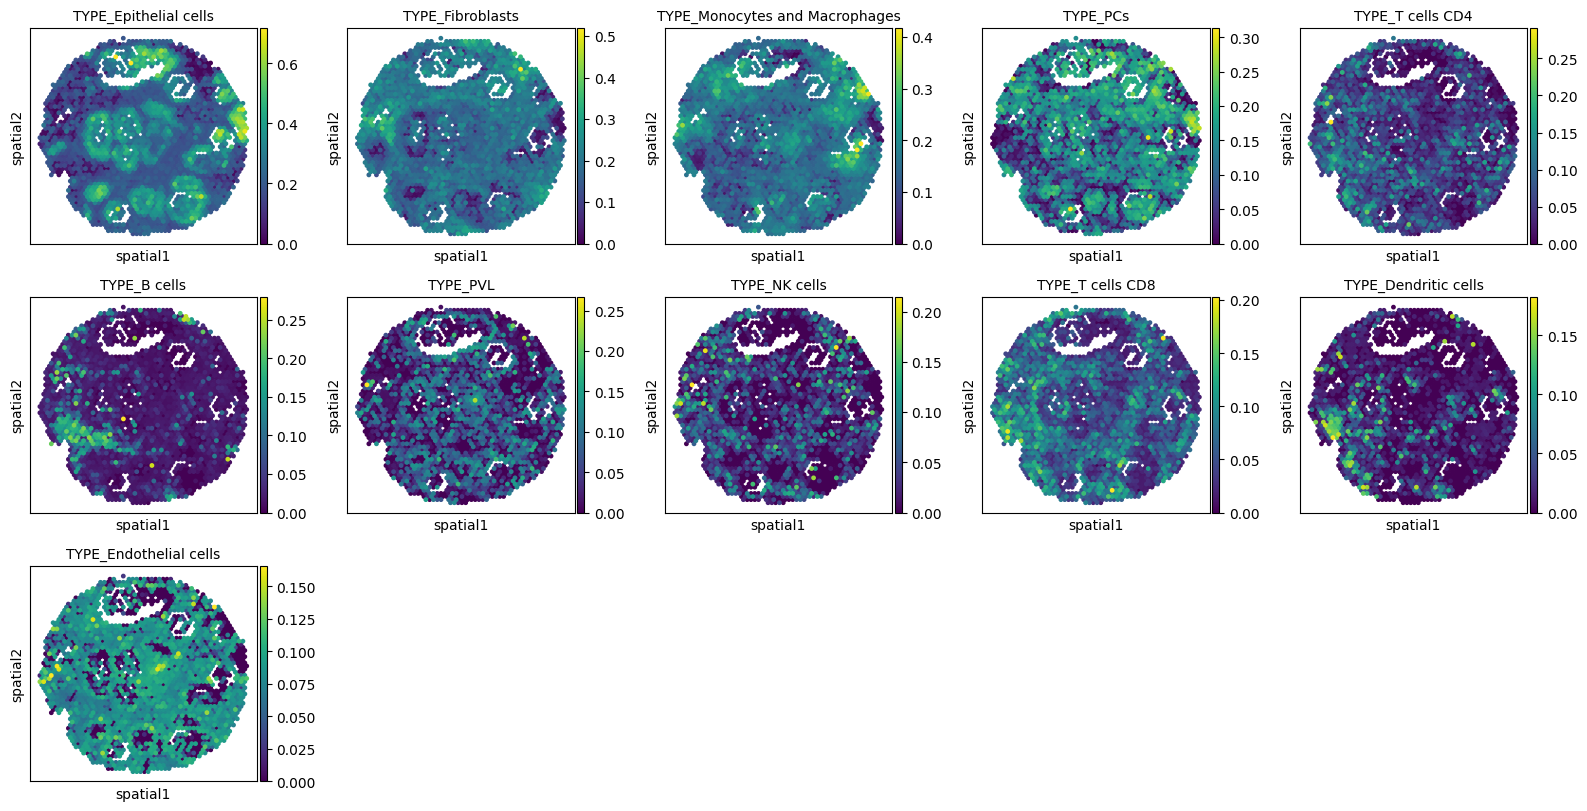

In [13]:
sc.pl.embedding(st_ad,color=celltype.sort_values(ascending=False)[:20].index,basis='spatial',ncols=5)

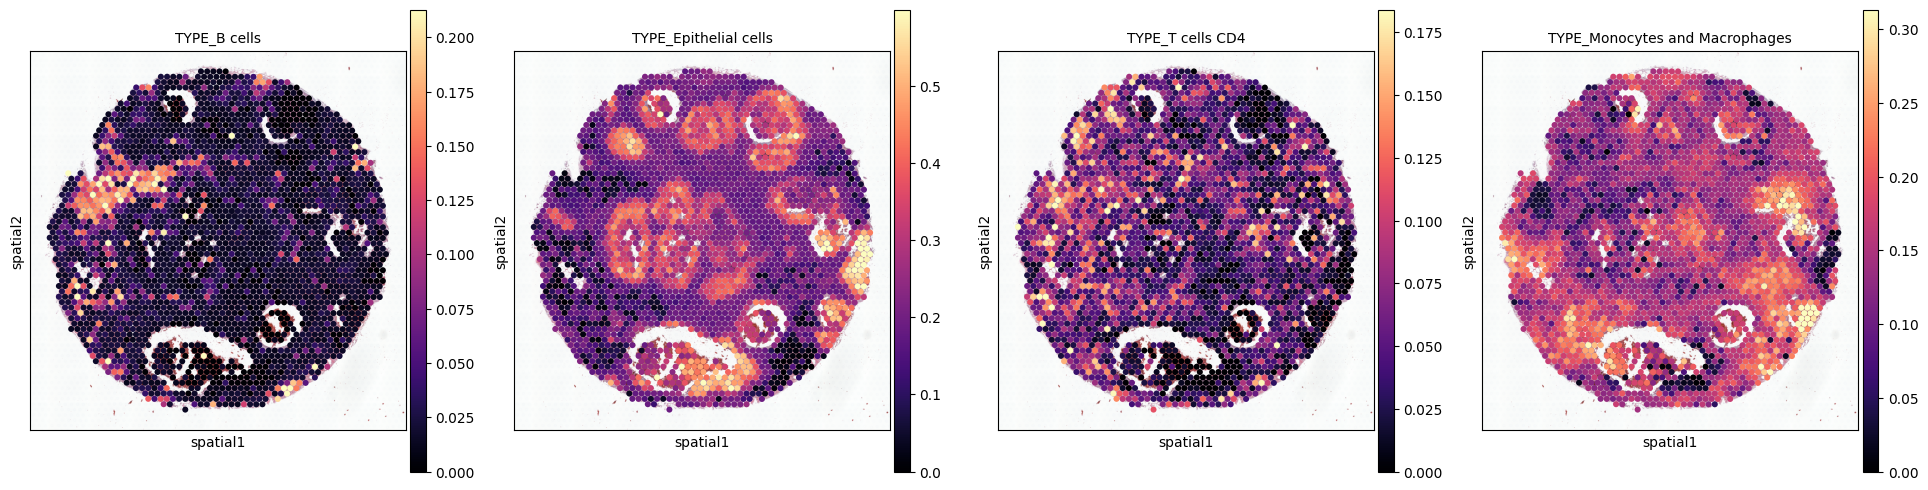

In [14]:
# Visualization of spatial distribution of scRNA-seq data   scRNA-seq 数据空间分布的可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
with mpl.rc_context({'axes.facecolor':'white',
                     'figure.figsize': [5, 6]}):

                        sc.pl.spatial(st_ad, cmap='magma',
                                # selected cell types
                                color=['TYPE_B cells',  'TYPE_Epithelial cells', 'TYPE_T cells CD4', 'TYPE_Monocytes and Macrophages'],
                                ncols=5, size=1.5,
                                img_key='hires',
                                # limit color scale at 99.2% quantile of cell abundance
                                vmin=0, vmax='p99.2',
                                show=True
                 )